
Handling for missing entries
Data types and formats that should be chaged
Univariate analysis of the feature
Bivariate anlaysis of the feature

In [2]:
import imp
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sys.path.append('../')
from scripts.missing_info import MissingValue
miss_val = MissingValue()

In [4]:
# import datasets
df_train = pd.read_csv('../data/train.csv',)
df_test = pd.read_csv('../data/test.csv')
df_store = pd.read_csv('../data/store.csv')

train= pd.read_csv('../data/train.csv',parse_dates=["Date"], 
                 index_col=["Date"])

/var/folders/pr/k1cjyyh56sv6wyyxm023snx00000gn/T/ipykernel_796/4138280627.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('../data/train.csv',)
/var/folders/pr/k1cjyyh56sv6wyyxm023snx00000gn/T/ipykernel_796/4138280627.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train= pd.read_csv('../data/train.csv',parse_dates=["Date"],


In [ ]:
df_train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [ ]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [ ]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


<b>`Data eploration for the sales for df_train`<b>

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# no missing values for this datase
df_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

<b>`Data Vizualization`<b>

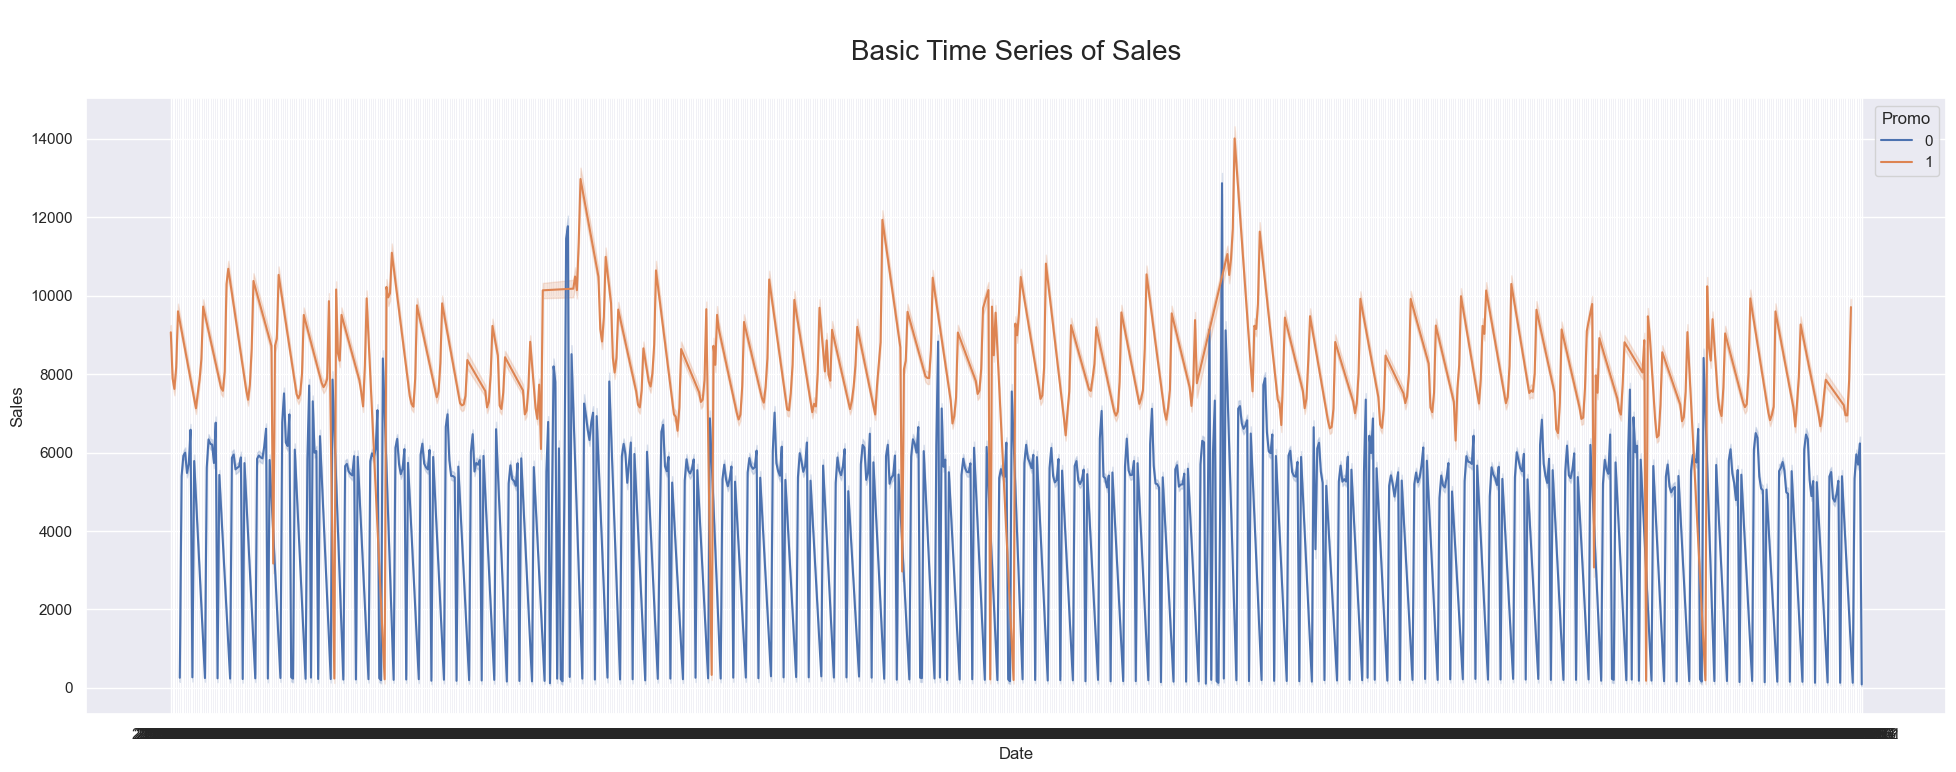

In [ ]:
sns.set(rc={'figure.figsize':(24,8)})
ax=sns.lineplot(data=df_train,x='Date',y='Sales',hue='Promo')
ax.axes.set_title("\nBasic Time Series of Sales\n",fontsize=20);

we can basically see that when Prom is 1 the sales are higher than when Promo is 0

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff2b27931c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff2b2793820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff2b22b3eb0>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff2b2793d00>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff2b2793fd0>,
 'means': []}

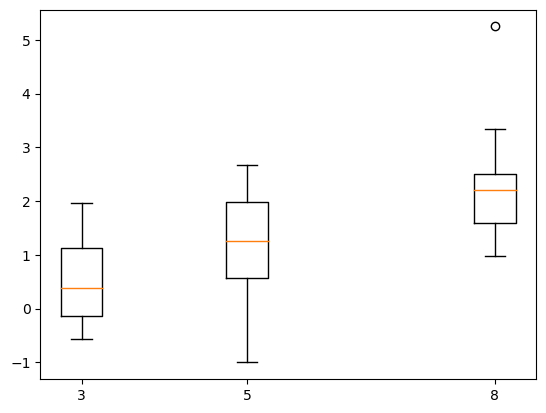

In [ ]:
np.random.seed(12345)
data = np.array( [ np.random.normal( i, 1, 10 ) for i in range(3) ] )
ii = np.array([ 3, 5, 8 ] )
df = pd.DataFrame( data=data, index=ii )
plt.boxplot( [ df.loc[i] for i in df.index ], vert=True, positions=ii )

In [ ]:
np.random.seed(345)
data = np.array( [ np.random.normal( i, 1, 10 ) for i in range(3) ] )
dates = pd.to_datetime( [ '2015-06-01', '2015-06-15', '2015-08-30' ] )
df = pd.DataFrame( data=data, index=dates )
df

,0,1,2,3,4,5,6,7,8,9
2015-06-01,1.469248,-1.150144,2.519226,-0.082478,-0.033601,-1.636656,-0.412092,1.784949,0.042383,-0.619732
2015-06-15,0.008309,1.136467,1.656681,0.503590,0.767424,1.379893,1.535374,-0.194115,-0.514435,1.116006
2015-08-30,2.259025,3.066208,1.559998,-0.147022,1.281347,1.543604,0.876745,1.361544,1.594094,2.395408


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff2b2943670>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff2b2943c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff2b29433a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff2b417c1c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff2b417c490>,
 'means': []}

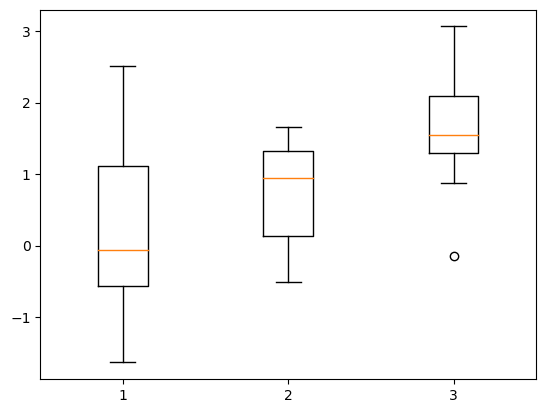

In [ ]:
plt.boxplot( [ df.loc[i] for i in df.index ], vert=True )

In [ ]:
np.random.seed(12345)
data = np.array( [ np.random.normal( i, 1, 10 ) for i in range(3) ] )
dates = pd.to_datetime( [ '2013-06-01', '2013-06-15', '2013-08-30' ] )
df = pd.DataFrame( data=data, index=dates )
df

,0,1,2,3,4,5,6,7,8,9
2013-06-01,-0.204708,0.478943,-0.519439,-0.555730,1.965781,1.393406,0.092908,0.281746,0.769023,1.246435
2013-06-15,2.007189,-0.296221,1.274992,1.228913,2.352917,1.886429,-1.001637,0.628157,2.669025,0.561430
2013-08-30,1.460259,2.476985,5.248944,0.978772,1.422913,2.124121,2.302614,2.523772,2.000940,3.343810


[Text(31, 0, '2013-06-01'),
 Text(45, 0, '2013-06-15'),
 Text(121, 0, '2013-08-30')]

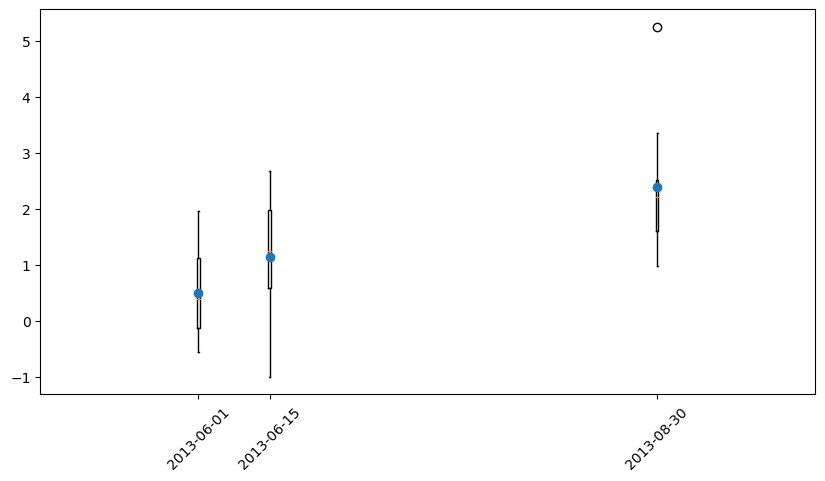

In [ ]:
fig, ax = plt.subplots( figsize=(10,5) )
x1 = pd.to_datetime( '2013-05-01' )
x2 = pd.to_datetime( '2013-09-30' )
pos = ( dates - x1 ).days

ax.boxplot( [ df.loc[i] for i in df.index ], vert=True, positions=pos )
ax.plot( pos, [ df.loc[i].mean() for i in df.index ], 'o' )

ax.set_xlim( [ 0, (x2-x1).days ] )
ax.set_xticklabels( dates.date, rotation=45 )

In [ ]:
df_train['Date'].min()

'2013-01-01'